In [50]:
# Panda for reading in csv file
import pandas as pd
# plt for plotting graphs
import matplotlib.pyplot as plt
# Linear regression models
from sklearn.linear_model import LinearRegression
# Neighbour regressor model
from sklearn.neighbors import KNeighborsRegressor
# Bayesian Ridge Model
from sklearn.linear_model import BayesianRidge
# Neural Network model
from sklearn.neural_network import MLPRegressor
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
# function for splitting training and testing data
from sklearn.model_selection import train_test_split
# error scores to compare different regression algorithms
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [51]:
# Setup DataFrame
df = pd.read_csv('data/DataEnergyClean.csv')

In [52]:
# Setting up our X for the multidimensional input
X = df.drop(columns='Appliances')
# Setting up the value we want to predict (Appliances, energy use in Wh)
y = df['Appliances']

# Setup the training data (X_train, y_train) which will use 80% of the dataset, 
# and the test data (X_test, y_test) which will use the remaining 20% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform your testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [57]:
# List of regression models to apply to dataset
models = {"Linear\n Regression": LinearRegression(n_jobs=-1),
          "Optimized\n Linear\n Regression": LinearRegression(n_jobs=-1, copy_X=True, fit_intercept=False, positive=False),
          "K-Nearest\n Neighbors": KNeighborsRegressor(n_jobs=-1, algorithm='auto', leaf_size=30, n_neighbors=5, p=2, weights='uniform'),
          "Optimized\n K-Nearest\n Neighbors": KNeighborsRegressor(n_jobs=-1, algorithm='auto', leaf_size=15, n_neighbors=5, p=1, weights='distance'),
          "Neural Net": MLPRegressor(solver='adam'),
          "Optimized\n Neural Net": MLPRegressor(activation='relu', alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, solver='adam'),
          "Bayesian\n Ridge ": BayesianRidge(),
          "Optimized\n Bayesian\n Ridge": BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-08, lambda_2=1e-06, max_iter=100),
          "Decision Tree\n Regressor": DecisionTreeRegressor(),
          "Optimized\n Decision Tree\n Regressor": DecisionTreeRegressor(criterion="poisson",max_depth=10,min_samples_split=10,random_state=2),
}


In [59]:
# Checking each model
model_mse_score = []
model_mae_score = []
model_r2_score = []

for model in models:
    print(f"Executing {model}...")

    if model == 'Neural Net' or model == 'Optimized\n Neural Net':
        # Fit the model to the scaled training data
        models[model].fit(X_train_scaled, y_train)
        # Make predictions using the scaled testing data
        y_pred = models[model].predict(X_test_scaled)
    else:
        
        models[model].fit(X_train, y_train)
        y_pred = models[model].predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_mse_score.append(mse)
    model_mae_score.append(mae)
    model_r2_score.append(r2)

Executing Linear
 Regression...
Executing Optimized
 Linear
 Regression...
Executing K-Nearest
 Neighbors...
Executing Optimized
 K-Nearest
 Neighbors...
Executing Neural Net...


c:\Users\Matt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Executing Optimized
 Neural Net...
Executing Bayesian
 Ridge ...
Executing Optimized
 Bayesian
 Ridge...
Executing Decision Tree
 Regressor...
Executing Optimized
 Decision Tree
 Regressor...


In [61]:
# Print out numerical values of results
i = 0
for key in models:
    print(f"==== {key} ====\nMSE: {model_mse_score[i]}\nMAE: {model_mae_score[i]}\nR2: {model_r2_score[i]}")
    i += 1

==== Linear
 Regression ====
MSE: 8318.156546947192
MAE: 52.56209025182259
R2: 0.16877377563969265
==== Optimized
 Linear
 Regression ====
MSE: 8317.395226863873
MAE: 52.59174412606296
R2: 0.16884985370035588
==== K-Nearest
 Neighbors ====
MSE: 5963.199391943248
MAE: 36.730174816316186
R2: 0.4041026172449438
==== Optimized
 K-Nearest
 Neighbors ====
MSE: 4295.136046138678
MAE: 30.04709313433644
R2: 0.5707907517013484
==== Neural Net ====
MSE: 9187.332622975817
MAE: 68.97342389965416
R2: 0.08191775845560423
==== Optimized
 Neural Net ====
MSE: 7963.629770811657
MAE: 46.91785558276682
R2: 0.20420133124032924
==== Bayesian
 Ridge  ====
MSE: 8317.472515222795
MAE: 52.53655013230312
R2: 0.16884213034117046
==== Optimized
 Bayesian
 Ridge ====
MSE: 8317.47251524541
MAE: 52.5365501341646
R2: 0.1688421303389105
==== Decision Tree
 Regressor ====
MSE: 8848.593868761085
MAE: 40.0
R2: 0.1157676306143296
==== Optimized
 Decision Tree
 Regressor ====
MSE: 7707.198947192669
MAE: 43.521656800821674
R

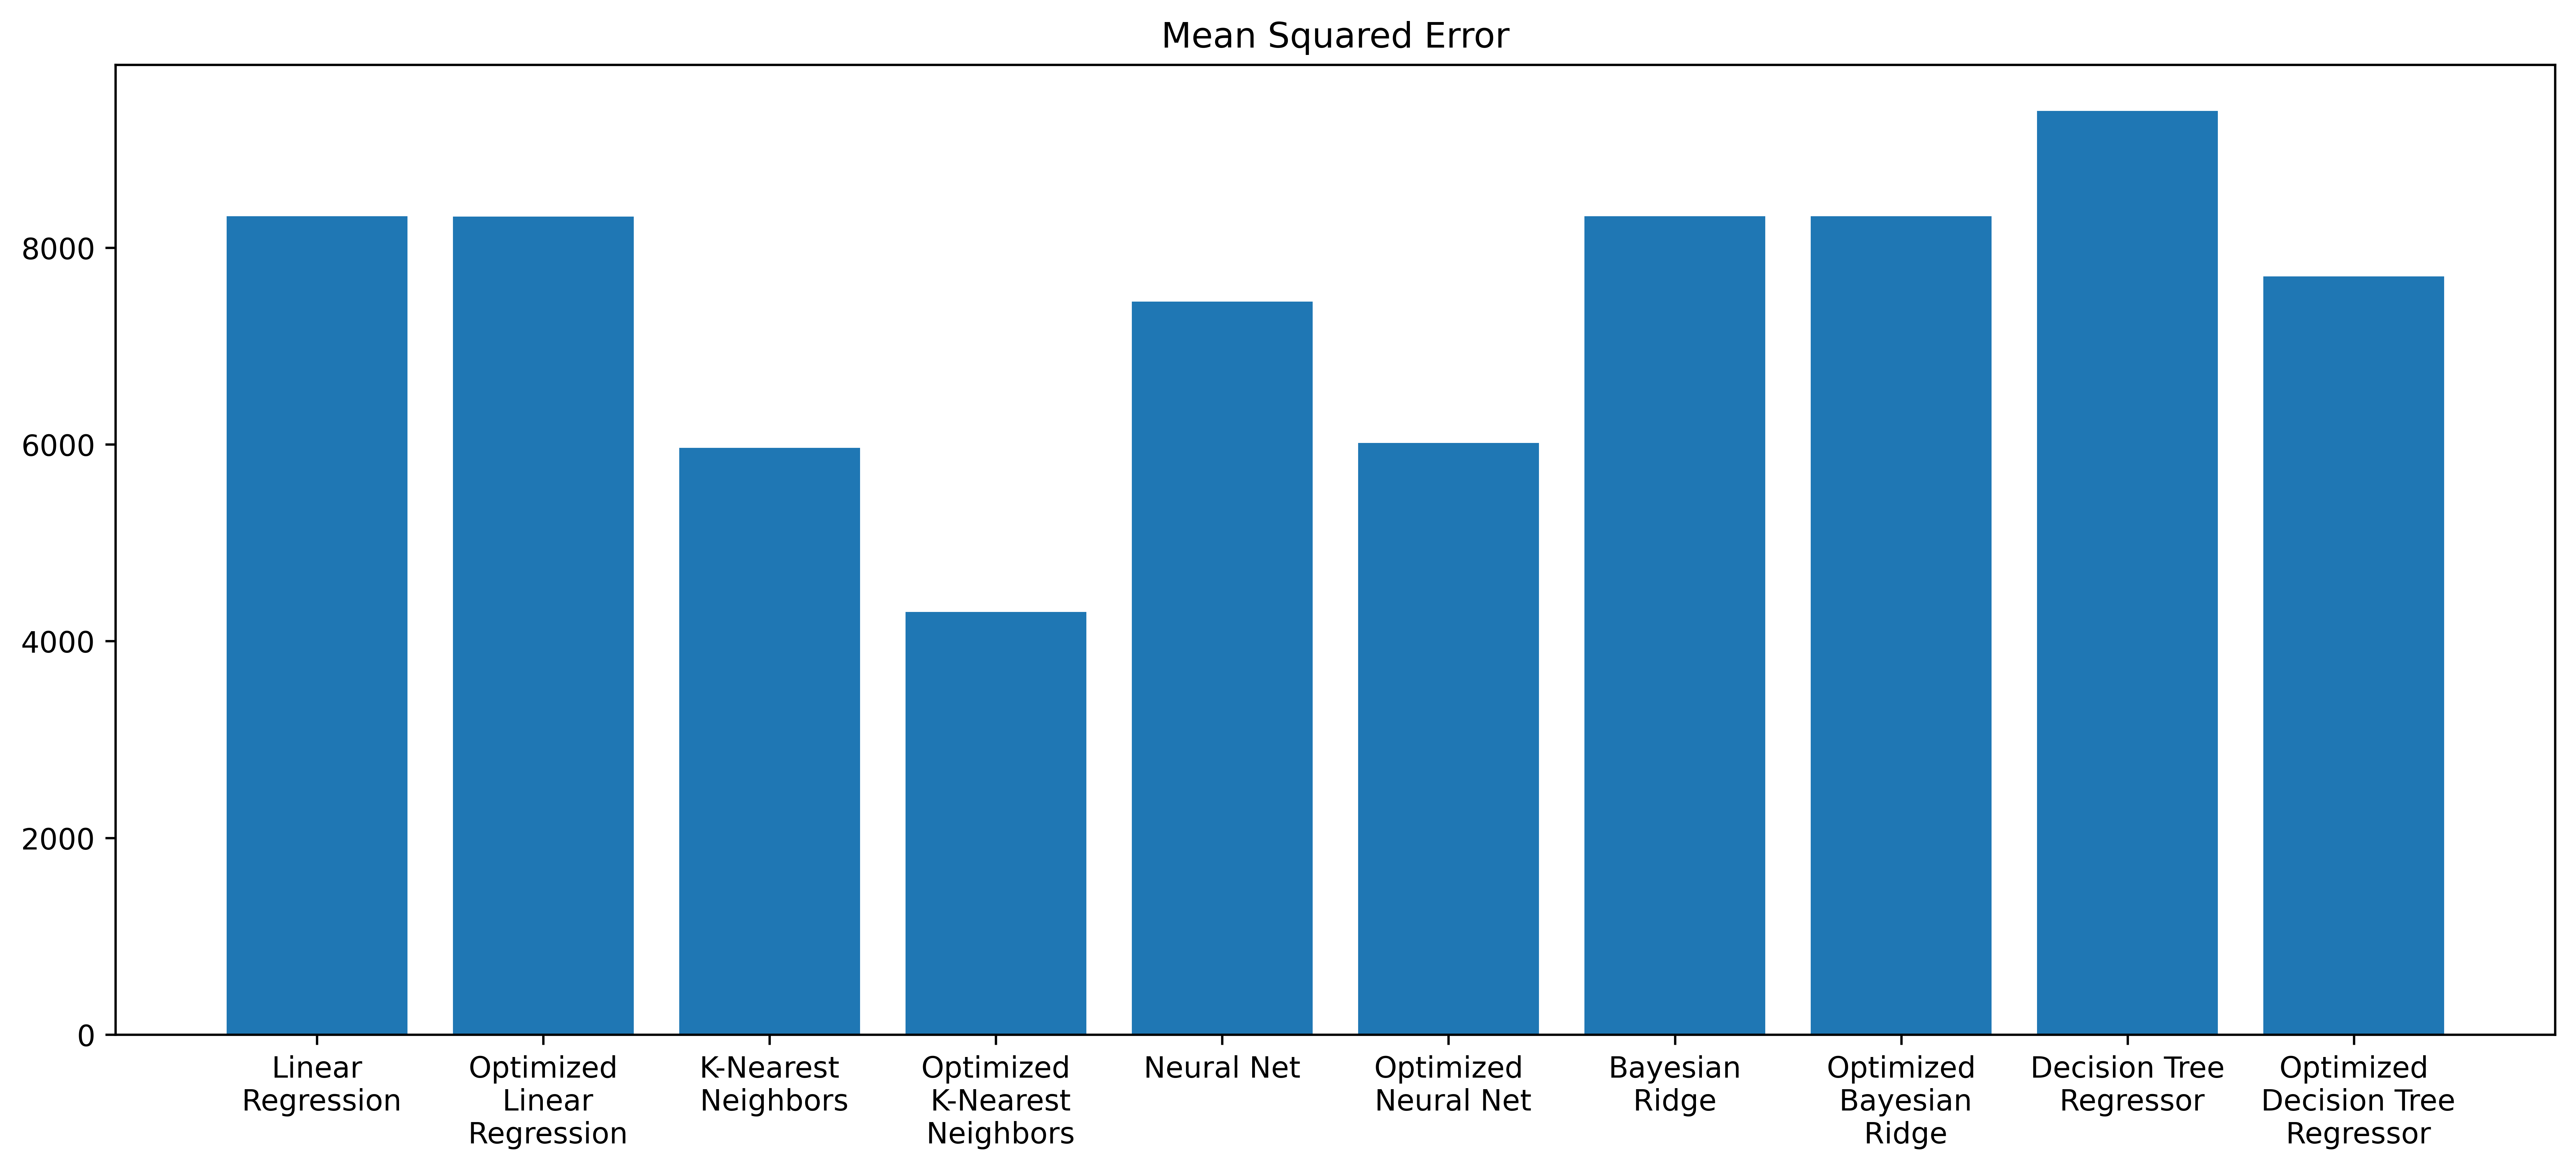

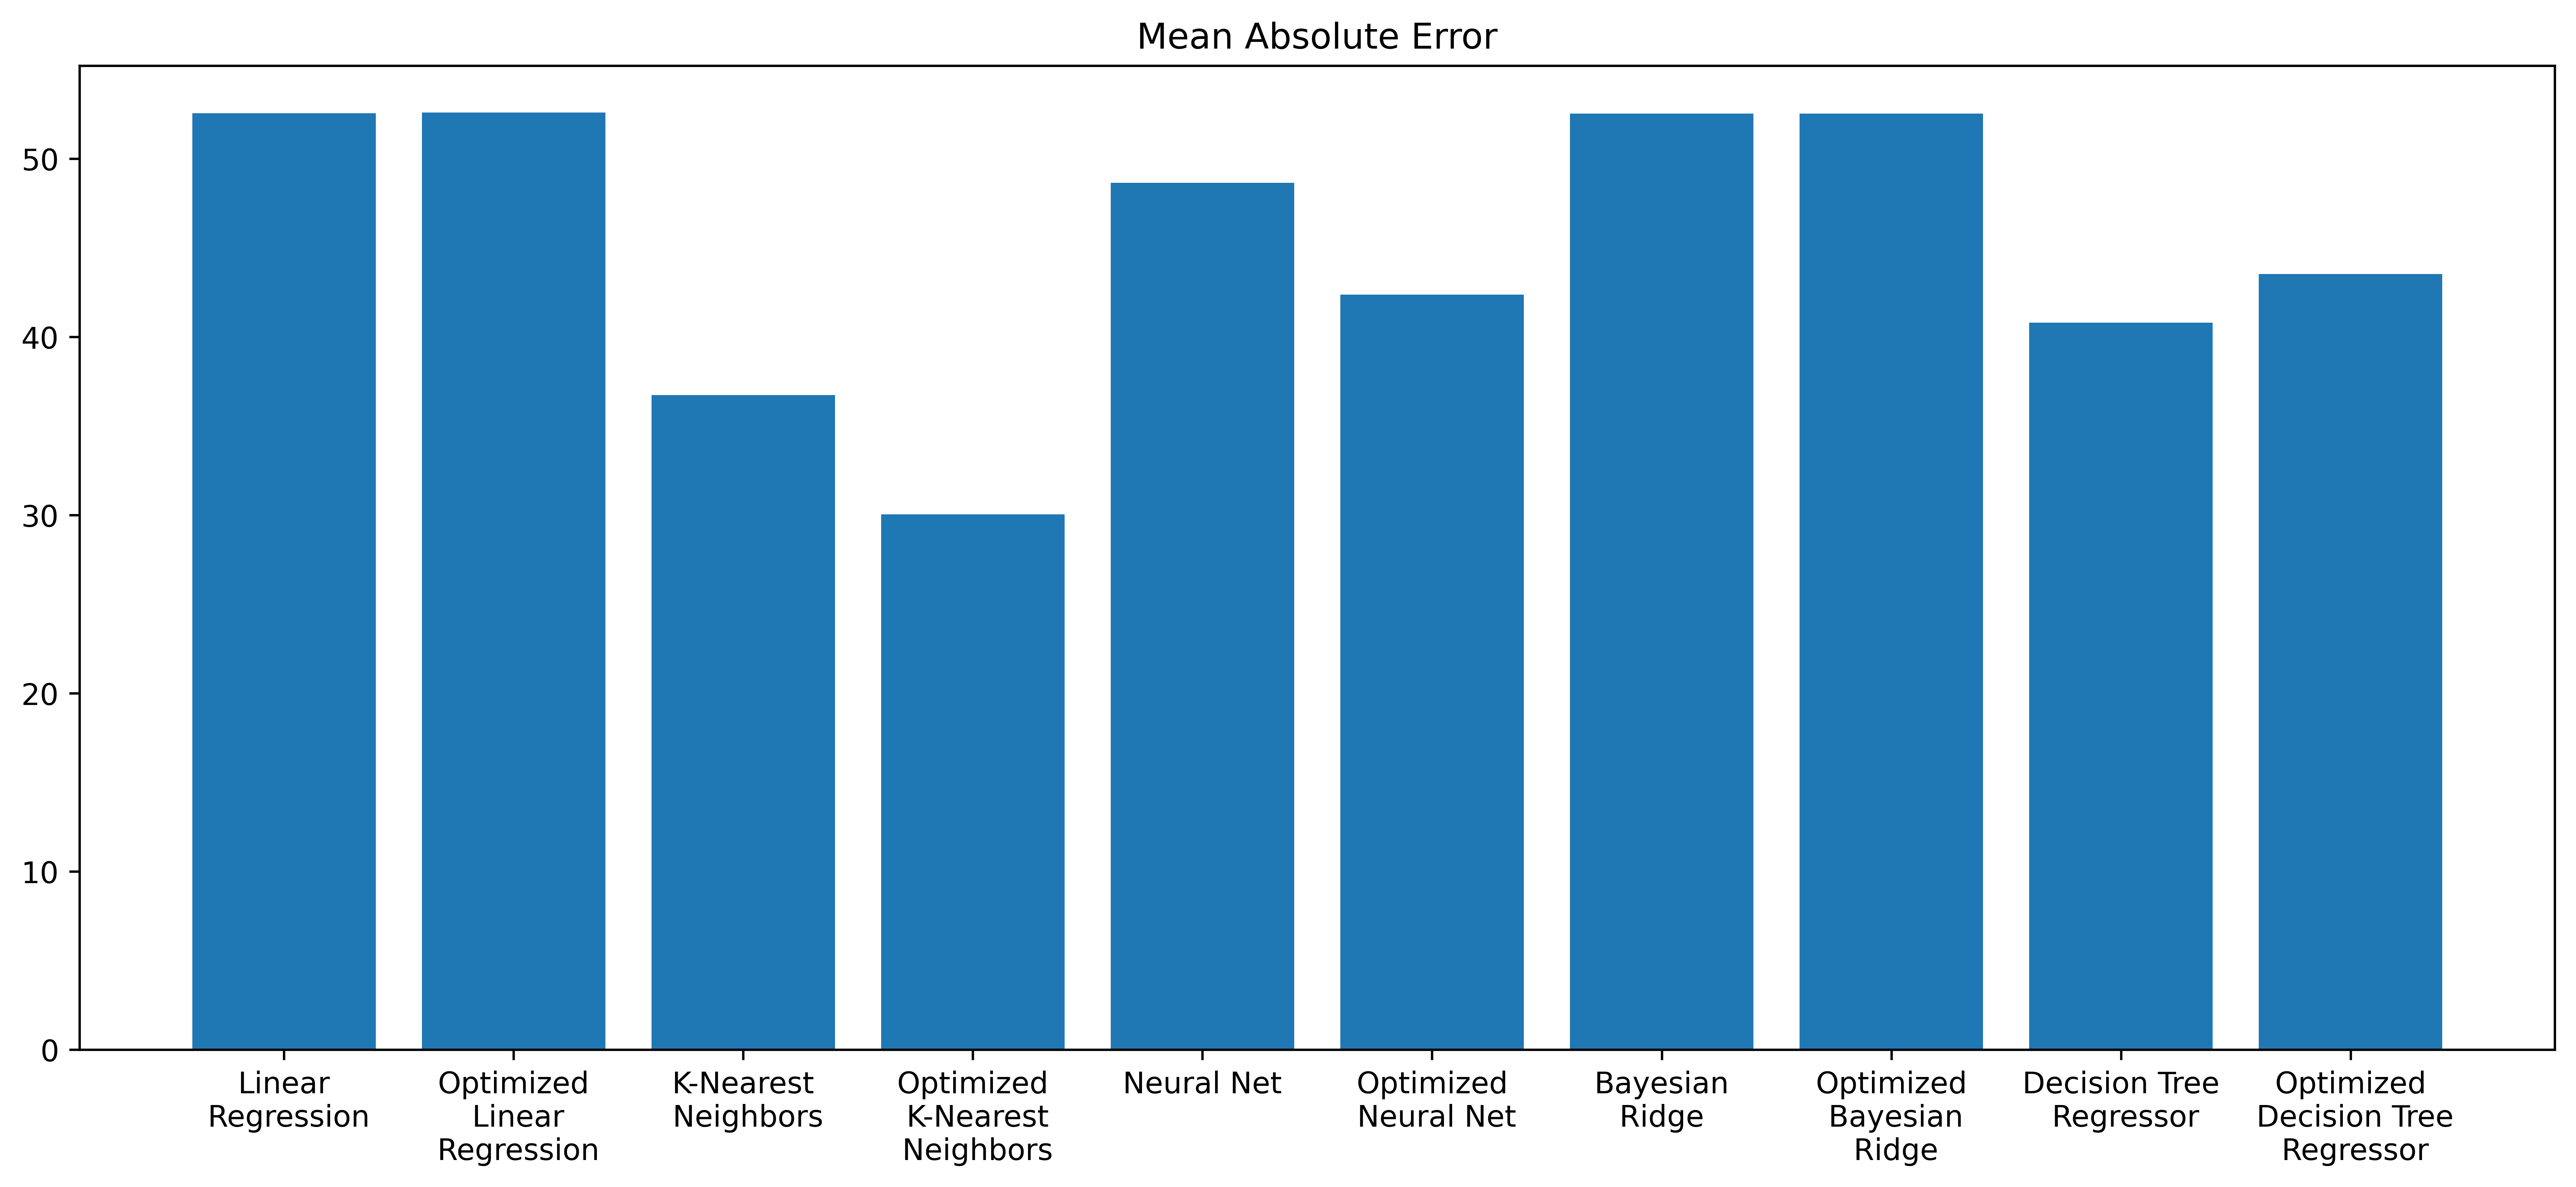

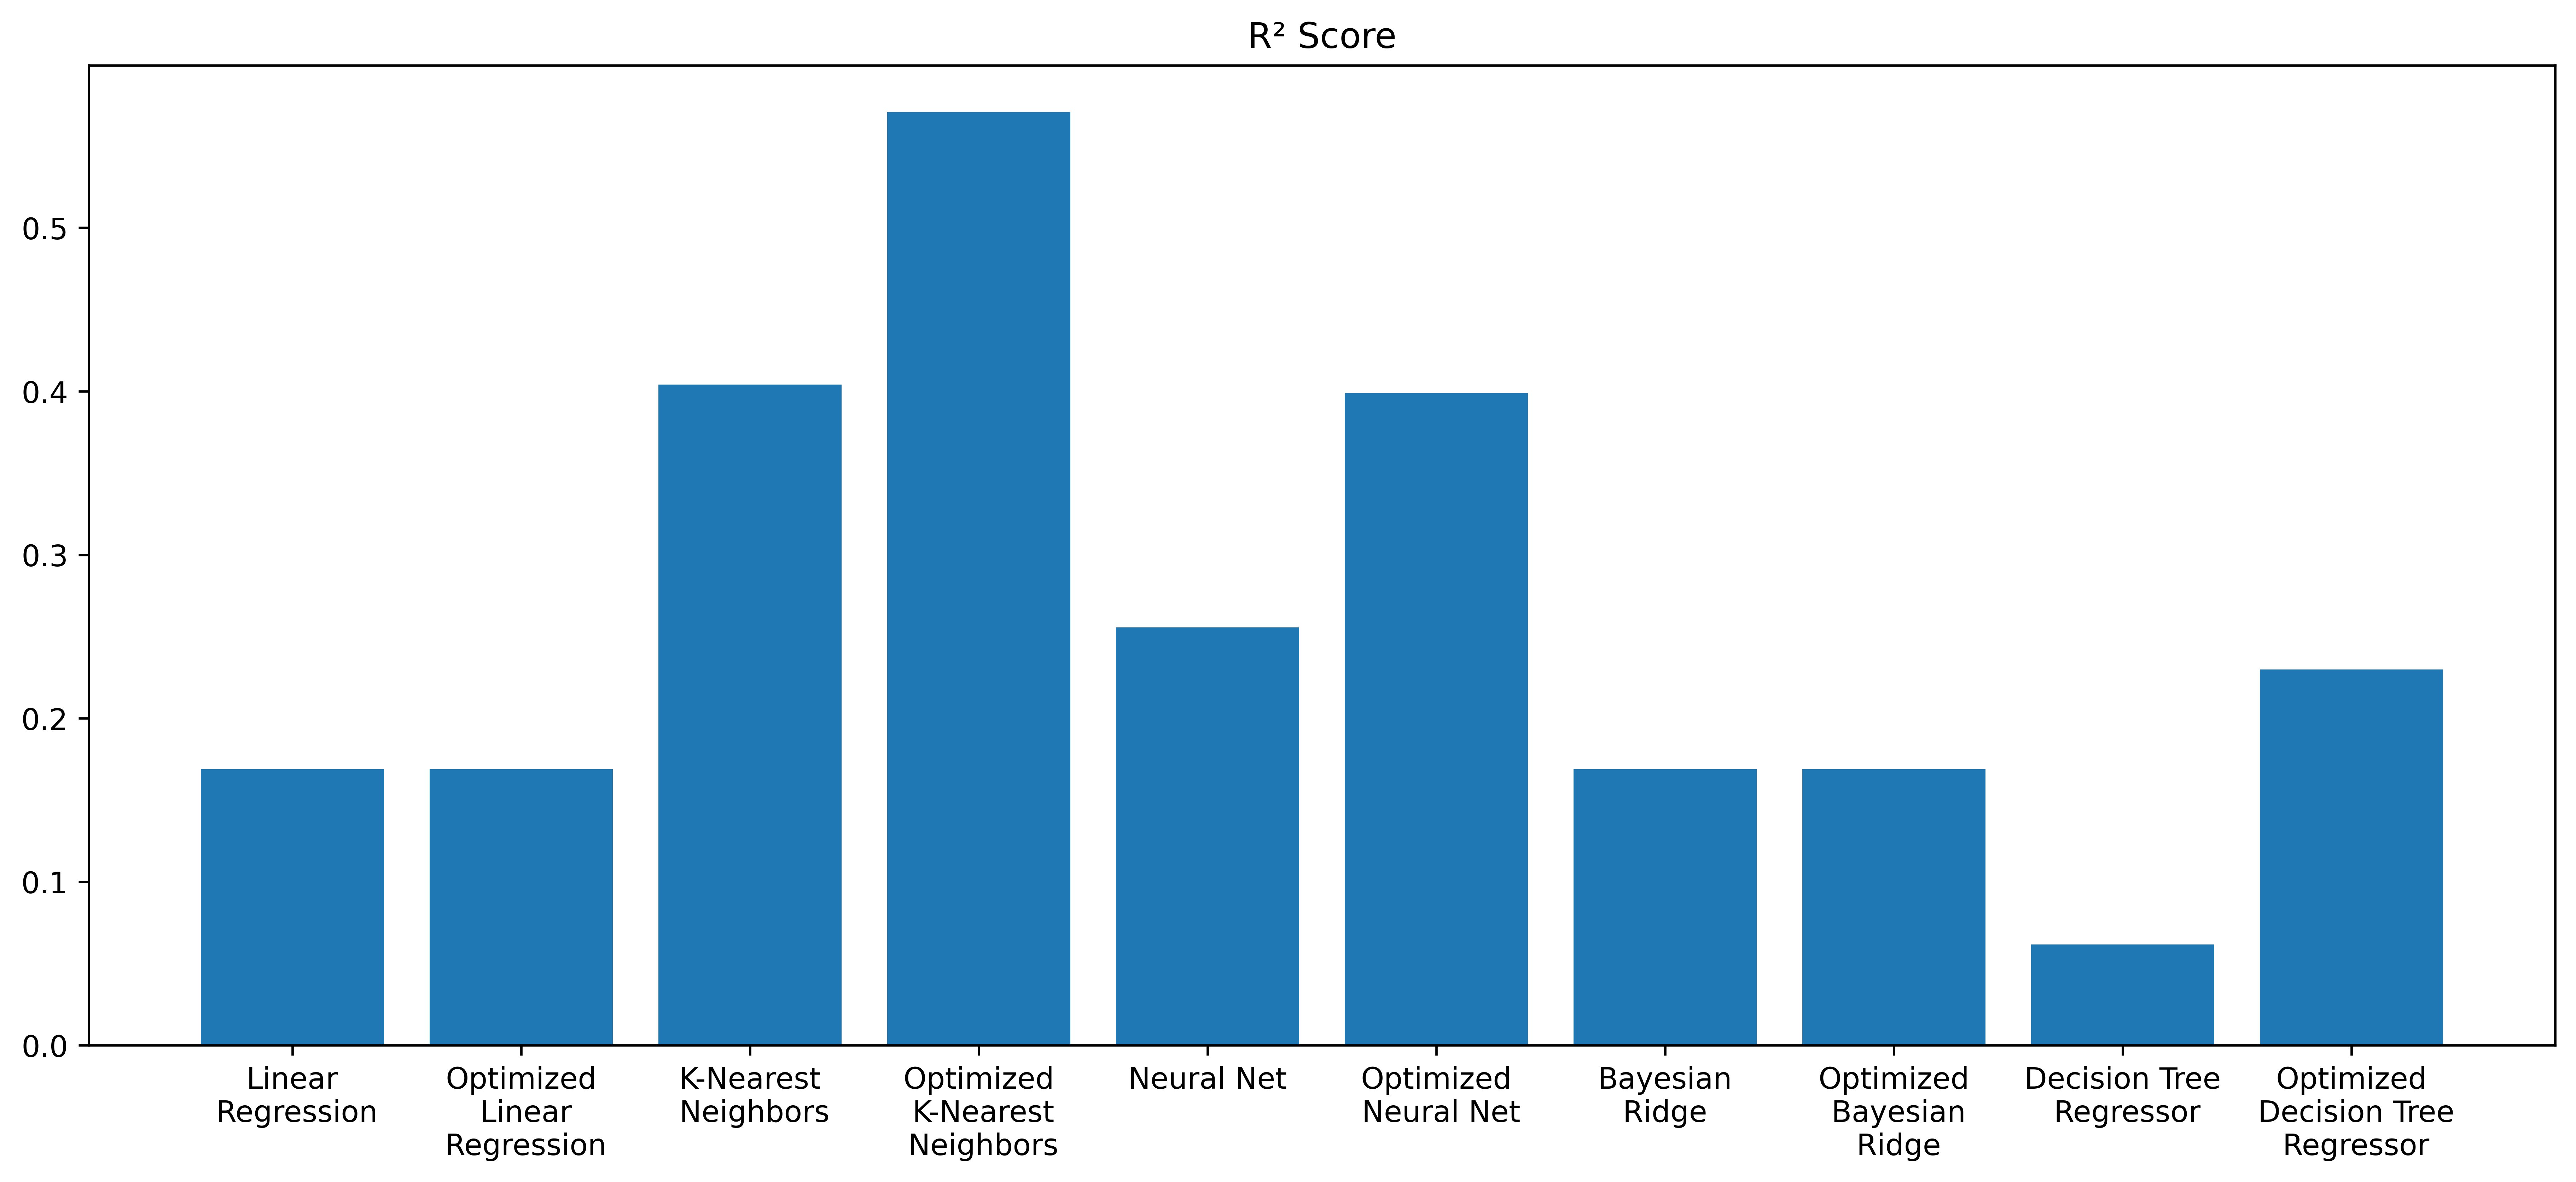

In [56]:
# Show how models measure up against each other
fig1, ax1 = plt.subplots(figsize=(15, 6), dpi=600)
ax1.bar(models.keys(), model_mse_score)
ax1.set_title('Mean Squared Error')
plt.show()

fig2, ax2 = plt.subplots(figsize=(15, 6), dpi=600)
ax2.bar(models.keys(), model_mae_score)
ax2.set_title('Mean Absolute Error')
plt.show()

fig3, ax3 = plt.subplots(figsize=(15, 6), dpi=600)
ax3.bar(models.keys(), model_r2_score)
ax3.set_title('R² Score')
plt.show()